# Hexadoku Solver With Constraint Propagation and DFS Search
### *Hexadoku: 16 x 16 Sudoku*

*by **Wei Xi** (xiwei26@rams.colostate.edu), **Yaowei Zong** (luke0zong@gmail.com), December, 2017*

*(For simplicity purposes, we use initials to distinguish which member did which part as: WX for Wei Xi and YZ for Yaowei Zong.)*

## Introduction

Sudoku has been one of the most popular brain game for a long time. The goal of this game is to fill a 9x9 puzzle grid with numbers 1-9 so that each row, column and 3×3 section contain all of the digits and every digit can only appear once in each row, column and section. 

Both of us like solving a 9x9 sudoku puzzle at ordinary times but we never tried to solve a 16x16 one. We assume the strategy would be the same and we are wondering if there’s any AI related algorithm that can help us to do so. After doing some research online, we’ve found that the constriant propagation combines the search algorithm is very useful to solve those kind of problem.

For this term project, we would like to study the algorithms and the 9x9 sudoku solver which is written by Peter Norvig and modifty it so it can also be applied to a 16x16 sudoku(Hexadoku) puzzle.

(*WX*)

<img style='float: left; margin: 25px;' src="https://upload.wikimedia.org/wikipedia/commons/e/e0/Sudoku_Puzzle_by_L2G-20050714_standardized_layout.svg" width="250"/><img style='float: right; margin: 25px;' src="https://raw.githubusercontent.com/luke0zong/CS440-final-project/master/Hexadoku.png" width="250"/>
<br/>
<p style='float: center; margin: 35px;'>Left: A 8x8 Sudoku puzzle example.</p>
<p style='float: center; margin: 35px;'>Right: A 16x16 Hexadoku puzzle example.</p>

*(YZ)*

## Methods

In this section, we first explain the notations we used to represent Hexadoku puzzles. We follow the same approach in Peter Norvig's article and extend the size of the grid to 16x16 and it works perfectly fine.

Then we explain the algorithms we used, which are ***`Constraint Propagation`*** and ***`Depth First Search`***. The reasons we choose those approaches are explained and demonstrated with examples.

*(YZ)*

### Hexadoku Notations

To start with, we need to define some notations on the problem.

A Hexadoku puzzle is a ***grid*** of **256 squares**. Unlike 8x8 Sudoku grid, we have 16 rows and 16 columns for Hexadoku grid. We define columns as hexidecimal number with lower case letters from 1 to 16 thus we have **`123456789abcdefg`**, and rows as upper case alphabet letters, so we have **`ABCDEFGHIJKLMNOP`**.

To define each square of the grid, we do a cross product of the columns and rows so we can have **`A1,A2...Pf,Pg`** to represent all the squares:

(*WX*)

In [1]:
# WX
import copy as cp
def cross(A, B):
    """Cross product of elements in A and elements in B."""
    return [a + b for a in A for b in B]

digits   = '123456789abcdefg'
rows     = 'ABCDEFGHIJKLMNOP'
cols     = digits

In [2]:
# YZ
from pandas import *
x = [cross(r, cols) for r in rows]
DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,A1,A2,A3,A4,A5,A6,A7,A8,A9,Aa,Ab,Ac,Ad,Ae,Af,Ag
1,B1,B2,B3,B4,B5,B6,B7,B8,B9,Ba,Bb,Bc,Bd,Be,Bf,Bg
2,C1,C2,C3,C4,C5,C6,C7,C8,C9,Ca,Cb,Cc,Cd,Ce,Cf,Cg
3,D1,D2,D3,D4,D5,D6,D7,D8,D9,Da,Db,Dc,Dd,De,Df,Dg
4,E1,E2,E3,E4,E5,E6,E7,E8,E9,Ea,Eb,Ec,Ed,Ee,Ef,Eg
5,F1,F2,F3,F4,F5,F6,F7,F8,F9,Fa,Fb,Fc,Fd,Fe,Ff,Fg
6,G1,G2,G3,G4,G5,G6,G7,G8,G9,Ga,Gb,Gc,Gd,Ge,Gf,Gg
7,H1,H2,H3,H4,H5,H6,H7,H8,H9,Ha,Hb,Hc,Hd,He,Hf,Hg
8,I1,I2,I3,I4,I5,I6,I7,I8,I9,Ia,Ib,Ic,Id,Ie,If,Ig
9,J1,J2,J3,J4,J5,J6,J7,J8,J9,Ja,Jb,Jc,Jd,Je,Jf,Jg


We also define the units and peers for one square as:

 - **units**: the row, column, and the 4x4 section the square is in.
 
 
 - **peers**: all other squares from the units the square is in.

In each unit, all the digit can only appear once. Each square should have **3** units(row, col and 4x4 section) and **39** peers.

(*WX*)

In [3]:
# WX
squares  = cross(rows, cols)
unitlist = ([cross(rows, c) for c in cols] +
        [cross(r, cols) for r in rows] +
        [cross(rs, cs) for rs in ('ABCD','EFGH','IJKL','MNOP') for cs in ('1234','5678','9abc','defg')])
units = dict((s, [u for u in unitlist if s in u]) 
         for s in squares)
peers = dict((s, set(sum(units[s],[]))-set([s]))
         for s in squares)

In [4]:
# YZ
xc = cp.deepcopy(x)
for r in xc:
    for i, n in enumerate(r):
        if n not in list(peers['G7']):
            if r[i] != 'G7':
                r[i] = '-'

For example, these are the peers for `cell(6,6)` `(G7)` from the table above:

In [5]:
# YZ
print("Num of peers for 'G7': " + str(len(peers['G7'])))
display(DataFrame(xc))

Num of peers for 'G7': 39


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-,-,-,-,-,-,A7,-,-,-,-,-,-,-,-,-
1,-,-,-,-,-,-,B7,-,-,-,-,-,-,-,-,-
2,-,-,-,-,-,-,C7,-,-,-,-,-,-,-,-,-
3,-,-,-,-,-,-,D7,-,-,-,-,-,-,-,-,-
4,-,-,-,-,E5,E6,E7,E8,-,-,-,-,-,-,-,-
5,-,-,-,-,F5,F6,F7,F8,-,-,-,-,-,-,-,-
6,G1,G2,G3,G4,G5,G6,G7,G8,G9,Ga,Gb,Gc,Gd,Ge,Gf,Gg
7,-,-,-,-,H5,H6,H7,H8,-,-,-,-,-,-,-,-
8,-,-,-,-,-,-,I7,-,-,-,-,-,-,-,-,-
9,-,-,-,-,-,-,J7,-,-,-,-,-,-,-,-,-


Then, we have **`grid_values_16()`** to transform a given grid.

In [6]:
# WX
def grid_values_16(grid):
    # Convert grid into a dict of {square: char} with '0' or '.' for empties.
    chars = [c for c in grid if c in digits or c in '0.']
    assert len(chars) == 256
    return dict(zip(squares, chars))

For example, given the following puzzle:

In [7]:
grid1 = '.f.1.2aec........63gc.84ef1.2...e.97b3f.........4d2c....6....f......e1b735a..8.c3g..24...e7d..5fb.5......94..6......d.g5f..c........9.1c.83ab.f.2c.b..e354....9.63.4..d..b91.cg2..a9......c.8.67c8..g..a.d...5..5...3.46.1f......916.e.b..2...a8.e...d9.4cb8..2.'
grid1

'.f.1.2aec........63gc.84ef1.2...e.97b3f.........4d2c....6....f......e1b735a..8.c3g..24...e7d..5fb.5......94..6......d.g5f..c........9.1c.83ab.f.2c.b..e354....9.63.4..d..b91.cg2..a9......c.8.67c8..g..a.d...5..5...3.46.1f......916.e.b..2...a8.e...d9.4cb8..2.'

We convert a given grid into a dict of {square: char} with `'0'` or `'.'` for empties.

The key of each entry will be the square position such as `'A1'`, `'G7'`. and the value of each key will be the possible digits for that square.

So the initial state transformed from *`grid_values_16()`* will be:

*(WX)*

In [11]:
grid_values_16(grid1)

{'A1': '.',
 'A2': 'f',
 'A3': '.',
 'A4': '1',
 'A5': '.',
 'A6': '2',
 'A7': 'a',
 'A8': 'e',
 'A9': 'c',
 'Aa': '.',
 'Ab': '.',
 'Ac': '.',
 'Ad': '.',
 'Ae': '.',
 'Af': '.',
 'Ag': '.',
 'B1': '.',
 'B2': '6',
 'B3': '3',
 'B4': 'g',
 'B5': 'c',
 'B6': '.',
 'B7': '8',
 'B8': '4',
 'B9': 'e',
 'Ba': 'f',
 'Bb': '1',
 'Bc': '.',
 'Bd': '2',
 'Be': '.',
 'Bf': '.',
 'Bg': '.',
 'C1': 'e',
 'C2': '.',
 'C3': '9',
 'C4': '7',
 'C5': 'b',
 'C6': '3',
 'C7': 'f',
 'C8': '.',
 'C9': '.',
 'Ca': '.',
 'Cb': '.',
 'Cc': '.',
 'Cd': '.',
 'Ce': '.',
 'Cf': '.',
 'Cg': '.',
 'D1': '4',
 'D2': 'd',
 'D3': '2',
 'D4': 'c',
 'D5': '.',
 'D6': '.',
 'D7': '.',
 'D8': '.',
 'D9': '6',
 'Da': '.',
 'Db': '.',
 'Dc': '.',
 'Dd': '.',
 'De': 'f',
 'Df': '.',
 'Dg': '.',
 'E1': '.',
 'E2': '.',
 'E3': '.',
 'E4': '.',
 'E5': 'e',
 'E6': '1',
 'E7': 'b',
 'E8': '7',
 'E9': '3',
 'Ea': '5',
 'Eb': 'a',
 'Ec': '.',
 'Ed': '.',
 'Ee': '8',
 'Ef': '.',
 'Eg': 'c',
 'F1': '3',
 'F2': 'g',
 'F3': '.',
 'F4

### Constraint Propagation

In [14]:
# WX
def parse_grid_16(grid):
    """Convert grid to a dict of possible values, {square: digits},
    or return False if a contradiction is detected."""
    # To start, every square can be any digit; then assign values from the grid.
    values = dict((s, digits) for s in squares)
    for s, d in grid_values_16(grid).items():
        if d in digits and not assign(values, s, d):
            return False  # Fail if we can't assign d to square s.
    return values


def assign(values, s, d):
    """Eliminate all the other values (except d) from values[s] and propagate.
        Return values, except return False if a contradiction is detected."""
    other_values = values[s].replace(d, '')
    if all(eliminate(values, s, d2) for d2 in other_values):
        return values
    else:
        return False


def eliminate(values, s, d):
    """Eliminate d from values[s]; propagate when values or places <= 2.
    Return values, except return False if a contradiction is detected."""
    if d not in values[s]:
        return values  # Already eliminated
    values[s] = values[s].replace(d, '')
    # (1) If a square s is reduced to one value d2, then eliminate d2 from the peers.
    if len(values[s]) == 0:
        return False  # Contradiction: removed last value
    elif len(values[s]) == 1:
        d2 = values[s]
        if not all(eliminate(values, s2, d2) for s2 in peers[s]):
            return False
    # (2) If a unit u is reduced to only one place for a value d, then put it there.
    for u in units[s]:
        dplaces = [s for s in u if d in values[s]]
    if len(dplaces) == 0:
        return False  # Contradiction: no place for this value
    elif len(dplaces) == 1:
        # d can only be in one place in unit; assign it there
        if not assign(values, dplaces[0], d):
            return False
    return values

The function ***`parse_grid_16()`*** turns the grid to a dict with all possible values for each square. It is done by calling the functions ***`assign()`*** and ***`eliminate()`***, which follows these two main rules:

> - If a square has only one possible value, then eliminate that value from the square's peers.


> - If a unit has only one possible place for a value, then put the value there.
 
> *(Peter Norvig)*

For example, if we have the dict like this `{A1: 1234567, A2: 1234567...}`, suppose we first assign 1 to A1, then the digit 1 should be removed from all A1's peers' list. We will have `{A1: 1, A2: 12345689...}`. 

As a example for the second rule, if `4` does not belong to any of the sqaure between `A3` to `A9`, then it must belonmg to `A2`. So after this, we will have `{A1:1, A2:4, ...}`. This is how we implemented the contraint propagation for this project.

*(WX)*

In [15]:
# WX
def display_16(values):
    """Display these values as a 2-D grid."""
    width = 1 + max(len(values[s]) for s in squares)
    line = '+'.join(['-' * (width * 4)] * 4)
    for r in rows:
        print (''.join(values[r + c].center(width) + ('|' if c in '48c' else '')
                       for c in cols))
        if r in 'DHL':
            print (line)
    print()

To demonstrate how this algorithm works, we need to display a given grid state.

For example, given an easy puzzle:

 > 8.b2.59.fc1e.a.7.41.2f..a9.6.d3..a.6e..7...5.f8..cf....3b..845..f...3d8..a2.7.1....d..4.7......2..a.f....6..e..d7...a.1..8f4....
 > 4ed8.1.96.5a.7.3..3a7..5.18.....6.2.c.3.4.9.d..b1..c..2..e3..6...76...b.54...9.89..f5..1.7.....6c8.392.41..f5..a..5.8c.6.dg.f3.1
 
The **`parse_grid_16()`** alone will solve the puzzle with constraint propagation without any problem:

*(YZ)*

In [59]:
# YZ
grid_easy = '8.b2.59.fc1e.a.7.41.2f..a9.6.d3..a.6e..7...5.f8..cf....3b..845..f...3d8..a2.7.1....d..4.7......2..a.f....6..e..d7...a.1..8f4....4ed8.1.96.5a.7.3..3a7..5.18.....6.2.c.3.4.9.d..b1..c..2..e3..6...76...b.54...9.89..f5..1.7.....6c8.392.41..f5..a..5.8c.6.dg.f3.1'
print("Puzzle for 'grid_easy':")
display_16(grid_values_16(grid_easy))
print("Solution for 'grid_easy':")
display_16(parse_grid_16(grid_easy))

Puzzle for 'grid_easy':
8 . b 2 |. 5 9 . |f c 1 e |. a . 7 
. 4 1 . |2 f . . |a 9 . 6 |. d 3 . 
. a . 6 |e . . 7 |. . . 5 |. f 8 . 
. c f . |. . . 3 |b . . 8 |4 5 . . 
--------+--------+--------+--------
f . . . |3 d 8 . |. a 2 . |7 . 1 . 
. . . d |. . 4 . |7 . . . |. . . 2 
. . a . |f . . . |. 6 . . |e . . d 
7 . . . |a . 1 . |. 8 f 4 |. . . . 
--------+--------+--------+--------
4 e d 8 |. 1 . 9 |6 . 5 a |. 7 . 3 
. . 3 a |7 . . 5 |. 1 8 . |. . . . 
6 . 2 . |c . 3 . |4 . 9 . |d . . b 
1 . . c |. . 2 . |. e 3 . |. 6 . . 
--------+--------+--------+--------
. 7 6 . |. . b . |5 4 . . |. 9 . 8 
9 . . f |5 . . 1 |. 7 . . |. . . 6 
c 8 . 3 |9 2 . 4 |1 . . f |5 . . a 
. . 5 . |8 c . 6 |. d g . |f 3 . 1 

Solution for 'grid_easy':
8 3 b 2 |4 5 9 d |f c 1 e |6 a g 7 
5 4 1 g |2 f c 8 |a 9 7 6 |b d 3 e 
d a 9 6 |e b g 7 |2 3 4 5 |1 f 8 c 
e c f 7 |1 6 a 3 |b g d 8 |4 5 2 9 
--------+--------+--------+--------
f 6 c 9 |3 d 8 b |e a 2 g |7 4 1 5 
3 1 8 d |6 e 4 g |7 5 c 9 |a b f 2 
g 2 a 4 |f 7 

As for more complicated puzzle such as grid1, this step is not good enough. 

In [61]:
# WX
print("Puzzle for 'grid1':")
display_16(grid_values_16(grid1))
print("Solution(partially) for 'grid1':")
display_16(parse_grid_16(grid1))

Puzzle for 'grid1':
. f . 1 |. 2 a e |c . . . |. . . . 
. 6 3 g |c . 8 4 |e f 1 . |2 . . . 
e . 9 7 |b 3 f . |. . . . |. . . . 
4 d 2 c |. . . . |6 . . . |. f . . 
--------+--------+--------+--------
. . . . |e 1 b 7 |3 5 a . |. 8 . c 
3 g . . |2 4 . . |. e 7 d |. . 5 f 
b . 5 . |. . . . |. 9 4 . |. 6 . . 
. . . . |d . g 5 |f . . c |. . . . 
--------+--------+--------+--------
. . . . |9 . 1 c |. 8 3 a |b . f . 
2 c . b |. . e 3 |5 4 . . |. . 9 . 
6 3 . 4 |. . d . |. b 9 1 |. c g 2 
. . a 9 |. . . . |. . c . |8 . 6 7 
--------+--------+--------+--------
c 8 . . |g . . a |. d . . |. 5 . . 
5 . . . |3 . 4 6 |. 1 f . |. . . . 
. 9 1 6 |. e . b |. . 2 . |. . a 8 
. e . . |. d 9 . |4 c b 8 |. . 2 . 

Solution(partially) for 'grid1':
  8     f     b     1   |  6     2     a     e   |  c     7     d     39  | 349g  49g    34    5   
  a     6     3     g   |  c     5     8     4   |  e     f     1     9b  |  2    79bd  7bd   9bd  
  e     5     9     7   |  b     3     f     d   |  8     2   

The cell above shows the result after we apply constraint propagation on the given puzzle: *`grid1`*. For squares with only one value, it means there is only one possible value for that slot according to constraint propagation; for squares with multiple digits(2 to 5 in this case), it means we have those possilble values that are to be determined.

We can see that most of the squares are filled after this step. But this is not good enough, we need to push further.

*(YZ)*

### Search

There are many strategies for solving Sudoku puzzles, but implementing  any of them will require extra coding and may not work on an arbitrary puzzle.

In order to solve every given Hexadoku, we can simply *search* for a solution given a partially solved state after applying **Constraint Propagation**.

*(YZ)*

In [82]:
# YZ
def solve_16(grid):
    return search(parse_grid_16(grid))


def search(values):
    """Using depth-first search and propagation, try all possible values."""
    if values is False:
        return False  # Failed earlier.
    if all(len(values[s]) == 1 for s in squares):
        return values  # Solved!
    # Chose the unfilled square s with the fewest possibilities
    n, s = min((len(values[s]), s) for s in squares if len(values[s]) > 1)
    return some(search(assign(values.copy(), s, d))
                for d in values[s])


def some(seq):
    """Return some element of seq that is true."""
    for e in seq:
        if e:
            return e
    return False


def time_solve(grid, out = False):
    import time
    start = time.clock()
    values = solve_16(grid)
    t = time.clock() - start
    if out:
        display_16(grid_values_16(grid))
        if values:
            display_16(values)
        print('(%.2f seconds)\n' % t)
    return (t, solved(values))


def solve_all(grids, name='', out = False):
    """Attempt to solve a sequence of grids. Report results."""
    times, results = zip(*[time_solve(grid, out) for grid in grids])
    N = len(results)
    if N > 1:
        print ("Solved %d of %d %s puzzles (avg %.2f secs (%.2f Hz), max %.2f secs)." % (
            sum(results), N, name, sum(times) / N, N / sum(times), max(times)))
    return list(times)


def solved(values):
    """A puzzle is solved if each unit is a permutation of the digits 1 to 16."""
    def unitsolved(unit):
        return set(values[s] for s in unit) == set(digits)
    return values is not False and all(unitsolved(unit) for unit in unitlist)


It is not a brute force search that we implemented: if we took this approach to try every single possibilities to find out one solution, it will take forever.

We actually don't need to try out all possibilities. Instead, as soon as we try one possibility, we can immediately eliminate many other possibilities. The search algorithm we have implemented is a ***`Depth First Search`*** because we need to recursively try all possibilities under one route before we try another.

The powerful part of DFS with *constraint propagation* is that once we hit a contradiction during the search, we can eliminate not just one possibility but usually a big portion of the *"possibility tree"*.

The search algorithm will return when each square has exactly one value. Otherwise we will do a variable ordering searching which means it will choose the undefined square with least possible numbers and keep searching for the solution. This strategy will ensure that we have a higher chance to *guess* the right value.

For example, for square `'Nd'`, it has 5 possiblities(`*9cdeg*`), which you will have a 4/5 chance(roughly, for there might be several correct solutions) to get the wrong path. However, for the I1 square, you only have two possibilities(dg) so you only have 1/2 chance to get the wrong number.

*(WX)*

In [85]:
solve_all([grid1, grid_easy], '',True)

. f . 1 |. 2 a e |c . . . |. . . . 
. 6 3 g |c . 8 4 |e f 1 . |2 . . . 
e . 9 7 |b 3 f . |. . . . |. . . . 
4 d 2 c |. . . . |6 . . . |. f . . 
--------+--------+--------+--------
. . . . |e 1 b 7 |3 5 a . |. 8 . c 
3 g . . |2 4 . . |. e 7 d |. . 5 f 
b . 5 . |. . . . |. 9 4 . |. 6 . . 
. . . . |d . g 5 |f . . c |. . . . 
--------+--------+--------+--------
. . . . |9 . 1 c |. 8 3 a |b . f . 
2 c . b |. . e 3 |5 4 . . |. . 9 . 
6 3 . 4 |. . d . |. b 9 1 |. c g 2 
. . a 9 |. . . . |. . c . |8 . 6 7 
--------+--------+--------+--------
c 8 . . |g . . a |. d . . |. 5 . . 
5 . . . |3 . 4 6 |. 1 f . |. . . . 
. 9 1 6 |. e . b |. . 2 . |. . a 8 
. e . . |. d 9 . |4 c b 8 |. . 2 . 

8 f b 1 |6 2 a e |c 7 d 3 |g 9 4 5 
a 6 3 g |c 5 8 4 |e f 1 9 |2 b 7 d 
e 5 9 7 |b 3 f d |8 2 g 4 |c a 1 6 
4 d 2 c |1 9 7 g |6 a 5 b |3 f 8 e 
--------+--------+--------+--------
9 2 6 f |e 1 b 7 |3 5 a g |4 8 d c 
3 g c 8 |2 4 6 9 |b e 7 d |a 1 5 f 
b a 5 d |8 c 3 f |1 9 4 2 |7 6 e g 
1 4 7 e |d a g 5 |f 6 8 c |

[0.04069099999999981, 0.03355999999999959]

## Results

To demonstrate how well our solver can perform on arbitrary puzzles, we write a helper program to get random puzzles from a website([http://www.sudoku-puzzles-online.com/hexadoku/print-hexadoku.php](http://www.sudoku-puzzles-online.com/hexadoku/print-hexadoku.php)), where you can print random Hexadoku puzzles at different levels.

The code to parse an HTML puzzle into the proper format that our solver can work on is as follows:

*(YZ)*

In [79]:
# YZ
def readHTML(level=1):
    import urllib.request
    pre = "http://www.sudoku-puzzles-online.com/cgi-bin/hexadoku/print-1-grid-hexadoku.cgi?"
    fp = urllib.request.urlopen(pre + str(level))
    my_bytes = fp.read()

    mystr = my_bytes.decode("utf8").splitlines()
    fp.close()

    myline = None
    for line in mystr:
        if line.startswith("</div><table id='table0'><tr><td>"):
            myline = line

    start = myline.find("<table id='grid'>") + len("<table id='grid'>")
    end = myline.find("</table>")
    my_grid = myline[start:end]

    grid_lines = my_grid.split('<tr>')
    puzzle = ''
    for l in grid_lines[1:]:
        l = l.replace('&nbsp;', '0').replace('<td>', '')
        puzzle += clean(l)

    return puzzle.replace('0', '.').lower()


def clean(s):
    import re
    s = re.sub("(<[^>]+>)", '', s)
    return s


def get_list(n, level=1):
    list = []
    while len(list) is not n:
        puzzle = readHTML(level)
        if puzzle not in list:
            list.append(puzzle)
    return list


def write_file(file_name, num, level=1):
    file = open(file_name, 'w')
    for item in get_list(num, level):
        file.write("%s\n" % item)

For example, to get 5 `Beginner level` Hexadoku puzzle, we can simply call `get_list(5, 1)`, where the first argument is the number of puzzles we want and the second argument is the level.

(You can also choose to write the puzzles to a file by calling `write_file(file_name, num, level)` and then solve all the puzzles in the file by calling `solve_all(open(file_name), name, display_bool)`)

In [96]:
easy_puzzles = get_list(5, 1)
easy_puzzles

['.4f..c.a..6.5...b.....5..4....9.d6....8eb......f9.caf......3.e...98..b..6172e....7...9d.e...48a..c.b...f8...65.....e....d....bf.e8..d.c.9.f.1..4..b...a9.e..36..c1.f2......d..57.d7....328...a..3.9d....7....c..8....6...f......1.65c......a...d7..c8.4...e....b',
 '.2.fe.7.5......a.d3e9....8...fb.9a....5....72.6....bf6.a....34.e..b3.....c.......8.cd41..a.f7...a46..e..b.8..9..25.....3..1..6..4...2.....7..a9.....71......e2..e32....8....d...b..15.9cd..e...6.7....f58.c..bd4.b......9....3.759.d....a..38...f..6.....2..5...',
 '.e.b.6...5..2f3.18....3...9..d....93........e.....a5cf.e...6..b..4........a9......f....2.c857ed9..baf.6..e3.....8.c...d...1.6..4..............c.........da.b..57678..ec.54..d.f...d.79..f....3.....71a.8.fd....b.94.6...e3..a..1.d.e2b.....a..9.f..25.e7....c.6.',
 '.e..3fb..4.86..7....a.e2..c...f...62..95a.d....8..d...6.f3.....c..f.7.c...5..e4adab7...e1c3.f..6ec3.d.4........2.8....a....d..5b....15.49fb78..e....e....d.2....7.a...f.ce.....9...6.c.98....fb.f6.c5b...9....8.b.4e..d

Now let's see how fast out solver can get a solution for each puzzle:

In [99]:
times_easy = solve_all(easy_puzzles, 'easy', False)

Solved 5 of 5 easy puzzles (avg 0.72 secs (1.39 Hz), max 2.11 secs).


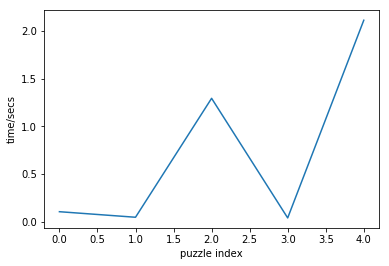

In [133]:
# YZ
import matplotlib.pyplot as plt
plt.plot(times_easy)
plt.xlabel("puzzle index")
plt.ylabel("time/secs")
plt.show()

The plot above shows how many seconds it took to solve every puzzle in the list. The average time is 0.72 seconds which is pretty fast to us.

Now, let's solve more puzzles and see what will the time distribution be.

In [111]:
times_mid = solve_all(get_list(25, 2), 'medium', True)

. 9 8 . |. e d . |. f . . |. . . . 
. e . . |. a 2 . |6 . . 9 |. . c . 
6 . . . |. . 3 7 |. . d a |. . f . 
. . c . |f . b 6 |e . . . |d 9 . . 
--------+--------+--------+--------
. . . 8 |c . . . |. . . . |a . 9 1 
. f 5 d |. . . . |. . . . |4 . . 8 
. . . . |. . f . |d . . . |e 6 . 5 
a . . . |. . . . |5 . c e |f . . . 
--------+--------+--------+--------
. 5 . . |e d . . |. . a . |. . . . 
. . 4 6 |. 9 . . |. . . 8 |. e . a 
. c 1 a |. . . 4 |f . . . |2 . . b 
f . . . |. b . 1 |3 . e . |. 5 4 d 
--------+--------+--------+--------
. . . . |d . e . |. . 1 2 |. . . . 
. . . 4 |. . . . |. . 6 5 |b . 1 . 
c 7 . . |b f . . |. . . . |5 . 3 . 
. . 3 b |. . c . |. 9 . 7 |8 . . . 

3 9 8 7 |4 e d 5 |1 f 2 c |g a b 6 
g e d f |1 a 2 8 |6 b 5 9 |7 4 c 3 
6 b 2 5 |9 c 3 7 |4 g d a |1 8 f e 
4 a c 1 |f g b 6 |e 8 7 3 |d 9 5 2 
--------+--------+--------+--------
b 6 e 8 |c 5 4 d |2 7 g f |a 3 9 1 
7 f 5 d |g 1 a e |9 6 3 b |4 c 2 8 
2 4 9 c |7 3 f b |d a 8 1 |e 6 g 5 
a 1 g 3 |6 8 9 2 |5 4 c e |

. . . . |6 . . . |. . . e |. d . . 
. 5 . . |. . 9 . |. . 4 . |. . 3 . 
. . d c |. . . 2 |8 . . a |4 . 1 7 
. . 2 b |. 5 . . |. d . c |. 8 9 e 
--------+--------+--------+--------
c . . . |. . . . |. e d . |. . 7 . 
. . . 9 |f 1 . . |6 . . . |. . d . 
4 8 7 . |b 9 . . |. f c . |. . . . 
. f 3 . |e . . . |. . b . |5 a . . 
--------+--------+--------+--------
3 . e . |. f . 4 |. 9 . . |. . . 8 
. . . . |. . d . |. . a . |c 4 b . 
. . . . |. e b . |. . 8 6 |3 f . . 
. . . . |. . . 7 |. . . f |. 2 5 a 
--------+--------+--------+--------
. 9 . . |. . a . |. . 7 . |d . f . 
. b f . |c 4 . 5 |. 6 . . |. . e . 
. . . d |. 8 . b |. . . . |6 . . . 
8 . . . |. . . . |9 c . . |7 . a b 

7 4 1 f |6 a g 8 |b 3 9 e |2 d c 5 
6 5 a 8 |d c 9 e |1 7 4 2 |f b 3 g 
9 e d c |3 b f 2 |8 5 g a |4 6 1 7 
g 3 2 b |7 5 4 1 |f d 6 c |a 8 9 e 
--------+--------+--------+--------
c 2 b 6 |4 g 8 a |3 e d 5 |9 1 7 f 
a g 5 9 |f 1 3 c |6 8 2 7 |b e d 4 
4 8 7 e |b 9 5 d |a f c 1 |g 3 2 6 
d f 3 1 |e 7 2 6 |4 g b 9 |

b . d . |. . e . |a 9 . c |8 . 4 . 
7 . . . |d 1 . . |. . . . |. f . . 
. . 2 e |. c . . |. b . . |. . . . 
. . 8 4 |b . 7 5 |6 . f . |d c e . 
--------+--------+--------+--------
. . . a |e . . . |. c . . |b . . 2 
9 f . 7 |. . 3 . |. . . . |. . . . 
. . 6 . |7 . a . |5 . . . |1 . 3 . 
3 4 c . |. 9 . 6 |. a . f |. . . 7 
--------+--------+--------+--------
. . . . |. . d . |f 6 . . |a . . . 
d . . . |5 . . . |. e . 4 |. . . . 
6 c . . |1 . . . |b . . 5 |. . . d 
. . . 3 |6 . . a |. 7 8 . |e . . . 
--------+--------+--------+--------
. . . d |. . . . |. f . a |9 e . . 
. . 4 9 |. . 8 7 |e . . b |. . . f 
. . . f |c . . . |d . . . |2 . 5 1 
a . 5 b |. . . e |c . . . |. 7 . . 

b 3 d 6 |g 2 e f |a 9 7 c |8 1 4 5 
7 g a c |d 1 4 9 |8 5 3 e |6 f 2 b 
f 5 2 e |a c 6 8 |4 b d 1 |7 3 9 g 
1 9 8 4 |b 3 7 5 |6 2 f g |d c e a 
--------+--------+--------+--------
5 8 1 a |e 4 g d |3 c 9 7 |b 6 f 2 
9 f b 7 |2 5 3 1 |g d 6 8 |4 a c e 
e d 6 g |7 f a c |5 4 b 2 |1 9 3 8 
3 4 c 2 |8 9 b 6 |1 a e f |

. f . . |. . d . |4 . . . |5 9 6 . 
. . e . |. a . 8 |6 . . . |. c d . 
5 6 . . |. . 9 b |. . a . |. . . f 
9 . d . |f . . . |3 . 8 . |4 a b . 
--------+--------+--------+--------
f 3 . . |. . . . |c . . . |8 . . 4 
4 5 6 . |3 . . . |. b . . |. . . . 
. 2 . 9 |. . 4 7 |. . e . |. . . . 
d . 8 . |. . 6 . |. 9 . f |. . . . 

g 9 4 5 |a 7 3 6 |1 2 d e |f 8 c b 
8 a f c |9 d 1 e |7 g b 5 |3 6 4 2 
3 e 2 7 |b 8 5 g |f c 6 4 |1 d a 9 
6 1 b d |4 c 2 f |9 a 3 8 |7 5 g e 
--------+--------+--------+--------
e g 9 1 |5 f b 4 |d 3 c a |6 2 7 8 
7 8 5 6 |2 3 c a |e 4 g 1 |9 b f d 
2 d a f |g e 8 1 |b 6 9 7 |c 4 3 5 
b 4 c 3 |6 9 7 d |5 8 f 2 |g 1 e a 
--------+--------+--------+--------
a f 7 8 |c 2 d 3 |4 e 1 b |5 9 6 g 
1 b e 4 |7 a g 8 |6 f 5 9 |2 c d 3 
5 6 3 g |1 4 9 b |2 d a c |e 7 8 f 
9 c d 2 |f 6 e 5 |3 7 8 g |4 a b 1 
--------+--------+--------+--------
f 3 1 b |d g a 9 |c 5 7 6 |8 e 2 4 
4 5 6 e |3 1 f c |8 b 2 d |a g 9 7 
c 2 g 9 |8 b 4 7 |a 1 e 3 |d f 5 6 
d 7 8 a |e 5 6 2 |g 9 4 f |

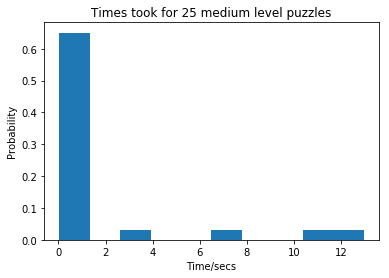

In [134]:
# YZ
plt.hist(times_mid, normed=True)
plt.title("Times took for 25 medium level puzzles")
plt.xlabel("Time/secs")
plt.ylabel("Probability")
plt.show()

Results above tell us that the solver still works pretty well on medium level puzzles: the average time took is 1.60 seconds and the max time took is 12.95 secs.

The plot above shows the time distribution for 25 medium level puzzles: the majority(about 60% percent) puzzles can be solved under 2 seconds, which is pretty good considering the size of the puzzle.

*(YZ)*

## Conclusions

From this project, we learned that ***Constraint Propagation*** is a very powerful tool to solve puzzles like this. It is pretty fast to eliminate wrong possibilities based on the rules of the puzzle. Sometimes this algorithm alone can solve a puzzle very fast and accurate.

In order to solve every arbitrary puzzle, we use ***DFS Search*** along with ***Constraint Propagation*** to try "some" of the possibilities. The reason why we don't need to guess every possible values for every square is that ***Constraint Propagation*** can give us a quick feedback when one value is wrong. This ensures we can have a fast working solver for Hexadoku puzzles.

During the process of implementing and testing the solver, we did meet some problems. First of all, there were not many text based Hexadoku puzzles available online. We first considered using `OpenCV` to parse images of puzzles to texts because there are some PDF version puzzles online. We did not follow this idea because there were some problems while installing the required libraries. Then we find out a website that can generate printable HTML puzzles and a simple HTML parsing program can give us endless examples to work on.

Another problem or possible improvement we noticed is the runtime for extramely complicated puzzles. One example you can try with is:

> ..f..d9.15....bc..4.......b.a..5..16...8.94..7.d....e3.4a67.........4..532.....95..9.c3f.1..........1.b..da.2f..2.e........5.4..7.a...d..8...142.b.e....c...798...6....e53.........5.6c.....f....6.8..2df..1...e.9.4a....bc8.d.1b.3...1..a......ce..9..b.....8..

> (It took 2791.41 seconds to get one solution on my 2.9 GHz Intel Core i7 laptop.)

We think one possible improvement we can make in the future is that we can implement the search algorithm as an *`Iterative Deepening Search`* that we learned this semester. Instead of going all the way down to a correct value or contradition, we can try different search routes and might have better results.

*(YZ)*

### References

* [Russell and Norvig, 2014] Stuart Russell and Peter Norvig, [Artificial Intelligence: A Modern Approach](http://aima.cs.berkeley.edu/), Prentice Hall. 2017.

* [Peter Norvig] Peter Norvig, [Solving Every Sudoku Puzzle](http://norvig.com/sudoku.html), Web. 2017

In [135]:
import io
from nbformat import current
import glob
nbfile = glob.glob('*.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

Word count for file Final-Report_Xi-Zong.ipynb is 1614
